<a href="https://colab.research.google.com/github/jeddyclass/202207.NCUT/blob/main/session_04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
from matplotlib.font_manager import fontManager

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [77]:
example_x = [1, 2, 4]
example_y = [2, 5, 3]

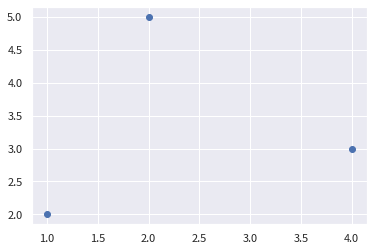

In [78]:
plt.scatter(example_x, example_y);

In [79]:
arrX = np.array(example_x)
arrY = np.array(example_y)

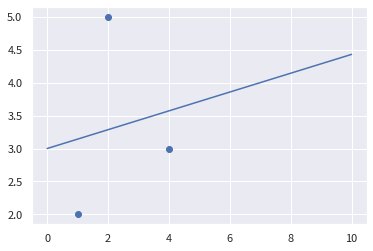

In [80]:
model = LinearRegression(fit_intercept=True)

model.fit(arrX[:, np.newaxis], arrY)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(example_x, example_y)
plt.plot(xfit, yfit);

In [81]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.142857142857143
Model intercept: 3.0


In [82]:
# Building the model
X_mean = np.mean(example_x)
Y_mean = np.mean(example_y)

num = 0
den = 0
for i in range(len(example_x)):
    num += (example_x[i] - X_mean)*(example_y[i] - Y_mean)
    den += (example_x[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

0.14285714285714285 3.0


## **使用鳶尾花資料來試試迴歸分析**

In [83]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
sns.set(style='darkgrid')
plt.rcParams['axes.unicode_minus']=False
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.family']='Taipei Sans TC Beta'

--2022-07-10 17:31:41--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.31.102, 74.125.31.100, 74.125.31.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jggmcqf4v68t9258l44p5fbo42q6lsnq/1657474275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=321e7da6-5f80-44f8-8669-8acc4ae73efe [following]
--2022-07-10 17:31:42--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jggmcqf4v68t9258l44p5fbo42q6lsnq/1657474275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=321e7da6-5f80-44f8-8669-8acc4ae73efe
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-0k-9o-d

In [84]:
#載入數據
iris=load_iris()
#display(iris)
print(iris.data[:10],iris.target[:10])
#iris.feature_names:特徵列名稱(sepal lenght/sepal width/petal length/petal width)
#iris.target_name:鳶尾花名(setosa/versicolor/virginica)
print(iris.feature_names,iris.target_names)
#iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])


iris_df= pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [85]:
iris_df = iris_df.drop('target', axis=1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## **Problem Statement: Predict the sepal length (cm) of the iris flowers**
## **預測花萼長度**

In [86]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [87]:
# Variables
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']

In [88]:
# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

In [89]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [90]:
# Training/Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

In [92]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.2595570975563035
Mean Squared Error: 0.10174529564238954
Mean Root Squared Error: 0.3189753840696638


In [93]:
iris_df.loc[6]

sepal length (cm)    4.6
sepal width (cm)     3.4
petal length (cm)    1.4
petal width (cm)     0.3
species              0.0
Name: 6, dtype: float64

In [94]:
d = {'sepal length (cm)' : [4.6],
    'sepal width (cm)' : [3.4],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.3],
    'species' : 0}
test_df = pd.DataFrame(data= d)
test_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.6,3.4,1.4,0.3,0


In [95]:
pred = lr.predict(X_test)
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 5.461145872156033
Actual Sepal Length (cm): 4.6
